In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid.inset_locator import inset_axes
import pickle

/anaconda3/envs/fiona_problem/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.
  after removing the cwd from sys.path.


# LAI

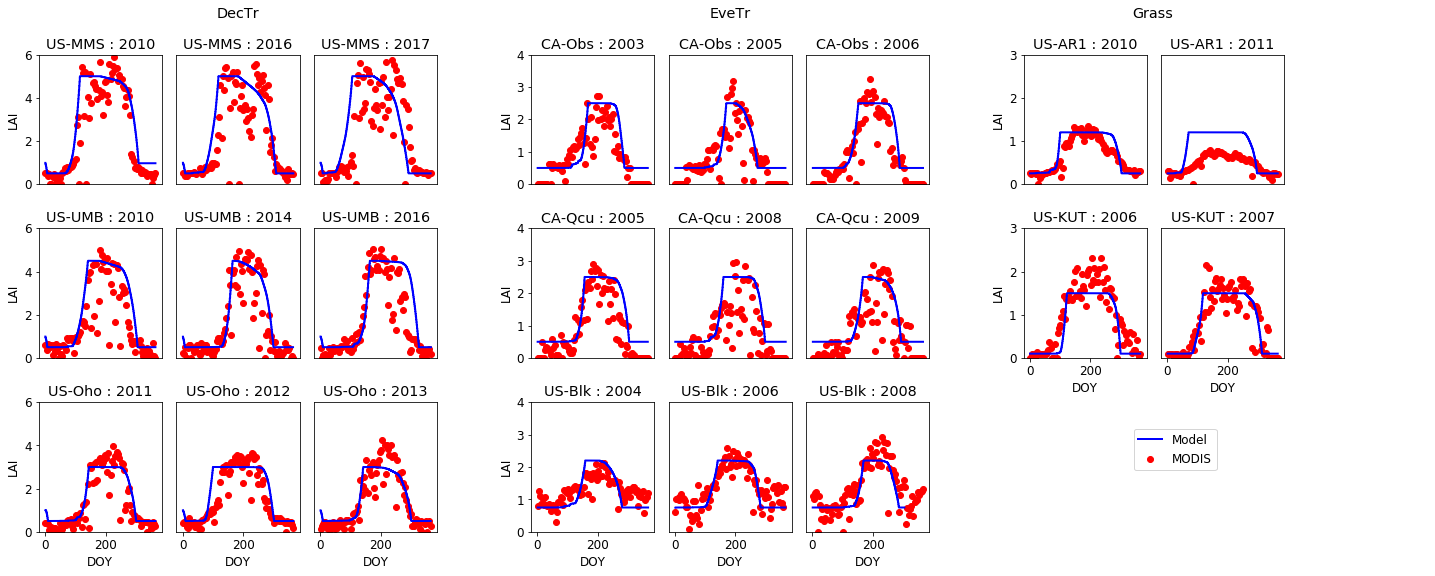

In [4]:
plt.rcParams.update({'font.size': 12})
fig,axs=plt.subplots(1,3,figsize=(25,9))
height=1.8
width="30%"
linewidth=2

ax=axs[0]
names=['US-MMS','US-UMB','US-Oho']
years={'US-MMS':[2010,2016,2017],
       'US-UMB':[2010,2014,2016],
       'US-Oho':[2011,2012,2013]
      }
fig_number={'US-MMS':[2,9,1],
       'US-UMB':[6,10,7],
       'US-Oho':[3,8,4]
      }

for name in names:
    

    for i,year in zip(fig_number[name],years[name]):
        box_1 = inset_axes(ax, 
                            width=width,
                            height=height, 
                            loc=i)
        
        with open('LAI/'+name+'-'+str(year)+'-MODIS','rb') as f:
            df_period=pickle.load(f)
        with open('LAI/'+name+'-'+str(year)+'-Model','rb') as f:
            lai_model=pickle.load(f)
            
        box_1.plot(lai_model.DOY,lai_model.LAI,color='b',label='Model',linewidth=linewidth)
        box_1.scatter(df_period.index,df_period.value_mean,color='r',label='MODIS')
        box_1.set_title(name+' : '+str(year))
        
        box_1.set_ylim([0,6])
        if i not in [3,4,8]:
            box_1.set_xticks([])
            box_1.set_xlabel('')
        else:
            box_1.set_xlabel('DOY')
        if i not in [2,3,6]:
            box_1.set_yticks([])
        else:
            box_1.set_ylabel('LAI')
        

ax.axis('off')
ax.set_title('DecTr',y=1.05)






names=['CA-Obs','CA-Qcu','US-Blk']
years={
       names[0]:[2003,2005,2006],
       names[1]:[2005,2008,2009],
       names[2]:[2004,2006,2008]
      }
fig_number={names[0]:[2,9,1],
            names[1]:[6,10,7],
            names[2]:[3,8,4]
      }

ax=axs[1]
for name in names:
    for i,year in zip(fig_number[name],years[name]):
        
        box_1 = inset_axes(ax, 
                            width=width,
                            height=height, 
                            loc=i)
        with open('LAI/'+name+'-'+str(year)+'-MODIS','rb') as f:
            df_period=pickle.load(f)
        with open('LAI/'+name+'-'+str(year)+'-Model','rb') as f:
            lai_model=pickle.load(f)

            box_1.plot(lai_model.DOY,lai_model.LAI,color='b',label='Model',linewidth=linewidth)
            box_1.scatter(df_period.index,df_period.value_mean,color='r',label='MODIS')
            box_1.set_title(name+' : '+str(year))
            box_1.set_ylim([0,4])

        if i not in [3,4,8]:
            box_1.set_xticks([])
            box_1.set_xlabel('')
        else:
            box_1.set_xlabel('DOY')

        if i not in [2,3,6]:
            box_1.set_yticks([])
        else:
            box_1.set_ylabel('LAI')
    
ax.axis('off')
ax.set_title('EveTr',y=1.05)






names=['US-AR1','US-KUT']
years={names[0]:[2010,2011],
       names[1]:[2006,2007]
      }
fig_number={names[0]:[2,9],
            names[1]:[6,10]
      }

ax=axs[2]

for name in names:
    

    for i,year in zip(fig_number[name],years[name]):

        box_1 = inset_axes(ax, 
                            width=width,
                            height=height, 
                            loc=i)
        with open('LAI/'+name+'-'+str(year)+'-MODIS','rb') as f:
            df_period=pickle.load(f)
        with open('LAI/'+name+'-'+str(year)+'-Model','rb') as f:
            lai_model=pickle.load(f)

            box_1.plot(lai_model.DOY,lai_model.LAI,color='b',label='Model',linewidth=linewidth)
            box_1.scatter(df_period.index,df_period.value_mean,color='r',label='MODIS')
            box_1.set_title(name+' : '+str(year))
            box_1.set_ylim([0,4])
        box_1.set_ylim([0,3])

        if i not in [10,6,7]:
            box_1.set_xticks([]) 
            box_1.set_xlabel('')
        else:
            box_1.set_xlabel('DOY')

        if i not in [2,3,6]:
            box_1.set_yticks([])
        else:
            box_1.set_ylabel('LAI')
    
    
    
ax.axis('off')
ax.set_title('Grass',x=.33,y=1.05)

plt.legend(bbox_to_anchor=(.5, -.5))

plt.savefig('LAI_all.png',dpi=300,bbox_inches = 'tight',pad_inches = 0.01)

# Alebdo

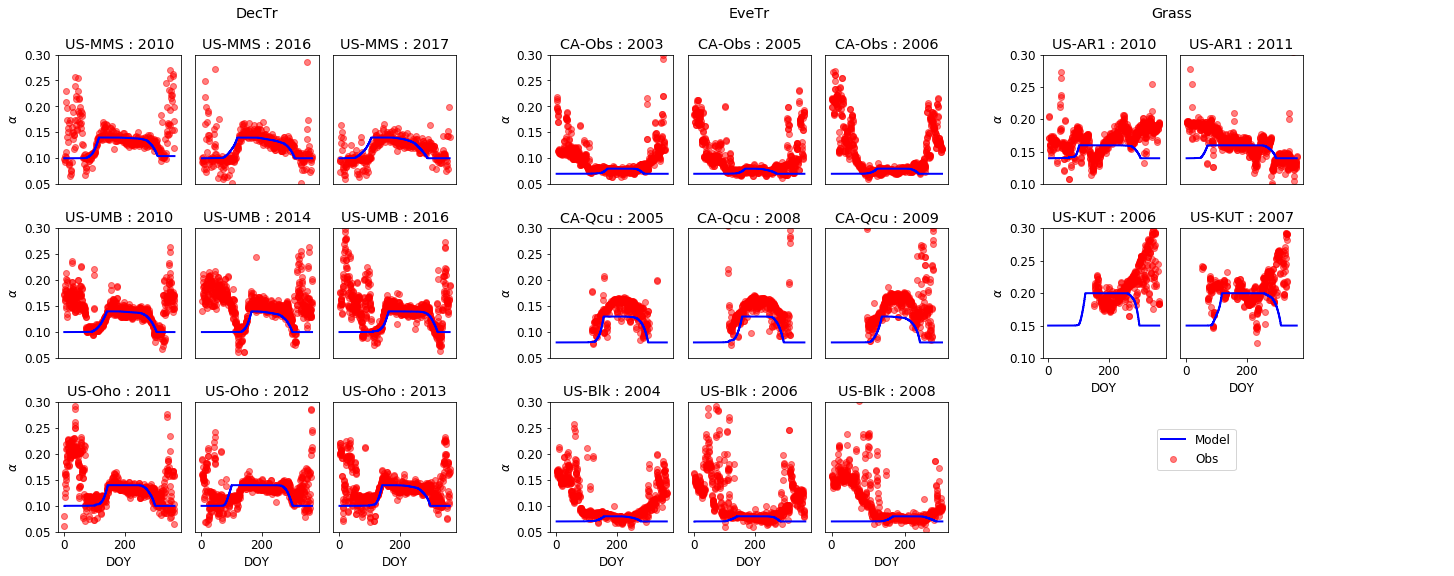

In [20]:
plt.rcParams.update({'font.size': 12})
fig,axs=plt.subplots(1,3,figsize=(25,9))
height=1.8
width="30%"
linewidth=2

ax=axs[0]
names=['US-MMS','US-UMB','US-Oho']
years={'US-MMS':[2010,2016,2017],
       'US-UMB':[2010,2014,2016],
       'US-Oho':[2011,2012,2013]
      }
fig_number={'US-MMS':[2,9,1],
       'US-UMB':[6,10,7],
       'US-Oho':[3,8,4]
      }

for name in names:
    

    for i,year in zip(fig_number[name],years[name]):
        box_1 = inset_axes(ax, 
                            width=width,
                            height=height, 
                            loc=i)
        
        with open('output/'+name+'-'+str(year),'rb') as f:
            out=pickle.load(f)
            
        box_1.plot(out['model']['x'],out['model']['y'],color='b',label='Model',linewidth=linewidth)
        box_1.scatter(out['obs']['x'],out['obs']['y'],alpha=0.5,color='r',label='Obs')
        box_1.set_title(name+' : '+str(year))
        box_1.set_ylim([0.05,.3])
        
        if i not in [3,4,8]:
            box_1.set_xticks([])
            box_1.set_xlabel('')
        else:
            box_1.set_xlabel('DOY')
        if i not in [2,3,6]:
            box_1.set_yticks([])
        else:
            box_1.set_ylabel(r'$\alpha$')
        

ax.axis('off')
ax.set_title('DecTr',y=1.05)






names=['CA-Obs','CA-Qcu','US-Blk']
years={
       names[0]:[2003,2005,2006],
       names[1]:[2005,2008,2009],
       names[2]:[2004,2006,2008]
      }
fig_number={names[0]:[2,9,1],
            names[1]:[6,10,7],
            names[2]:[3,8,4]
      }

ax=axs[1]
for name in names:
    for i,year in zip(fig_number[name],years[name]):
        
        box_1 = inset_axes(ax, 
                            width=width,
                            height=height, 
                            loc=i)
        with open('output/'+name+'-'+str(year),'rb') as f:
            out=pickle.load(f)
            
        box_1.plot(out['model']['x'],out['model']['y'],color='b',label='Model',linewidth=linewidth)
        box_1.scatter(out['obs']['x'],out['obs']['y'],alpha=0.5,color='r',label='Obs')
        box_1.set_title(name+' : '+str(year))
        box_1.set_ylim([0.05,.3])

        if i not in [3,4,8]:
            box_1.set_xticks([])
            box_1.set_xlabel('')
        else:
            box_1.set_xlabel('DOY')

        if i not in [2,3,6]:
            box_1.set_yticks([])
        else:
            box_1.set_ylabel(r'$\alpha$')
    
ax.axis('off')
ax.set_title('EveTr',y=1.05)






names=['US-AR1','US-KUT']
years={names[0]:[2010,2011],
       names[1]:[2006,2007]
      }
fig_number={names[0]:[2,9],
            names[1]:[6,10]
      }

ax=axs[2]

for name in names:
    

    for i,year in zip(fig_number[name],years[name]):

        box_1 = inset_axes(ax, 
                            width=width,
                            height=height, 
                            loc=i)
        with open('output/'+name+'-'+str(year),'rb') as f:
            out=pickle.load(f)
            
        box_1.plot(out['model']['x'],out['model']['y'],color='b',label='Model',linewidth=linewidth)
        box_1.scatter(out['obs']['x'],out['obs']['y'],alpha=0.5,color='r',label='Obs')
        box_1.set_title(name+' : '+str(year))
        box_1.set_ylim([0.1,.3])

        if i not in [10,6,7]:
            box_1.set_xticks([]) 
            box_1.set_xlabel('')
        else:
            box_1.set_xlabel('DOY')

        if i not in [2,3,6]:
            box_1.set_yticks([])
        else:
            box_1.set_ylabel(r'$\alpha$')
    
    
    
ax.axis('off')
ax.set_title('Grass',x=.33,y=1.05)

plt.legend(bbox_to_anchor=(.5, -.5))

plt.savefig('albedo_all.png',dpi=300,bbox_inches = 'tight',pad_inches = 0.01)